In [16]:
from rayleigh_diagnostics import G_Avgs, build_file_list, Compile_GlobalAverages
import matplotlib.pyplot as plt
import numpy

In [17]:
pref = ['./ra1e6/']
cases=['ek1em3_ra1e6_fr0', 'ek1em3_ra1e6_fr0.1', 'ek1em3_ra1e6_fr0.5', 'ek1em3_ra1e6_fr1.0', 'ek1em3_ra1e6_fr1.5' ]
imin = 0
imax = 10000000 # 10 million

In [18]:
comp_files=[]
for p in pref:
    ctemp=[]
    for c in cases:
        case_path = p+c
        files = build_file_list(imin,imax,path = case_path+'/G_Avgs')  # Build file list
        nf = len(files)   # grab first and last iter for compiled file  name
        f0 = files[0].split('/')
        f1 = files[nf-1].split('/')
        i0 = f0[len(f0)-1]
        i1 = f1[len(f1)-1]
        comp_file=case_path+'/gcomp_'+i0+'_'+i1
        ctemp.append(comp_file)
        Compile_GlobalAverages(files,comp_file)
    comp_files.append(ctemp)

In [19]:
#Loop over the compiled files
gavgs = []
for cf in comp_files[0]:
    g = G_Avgs(cf,path='')
    gavgs.append(g)

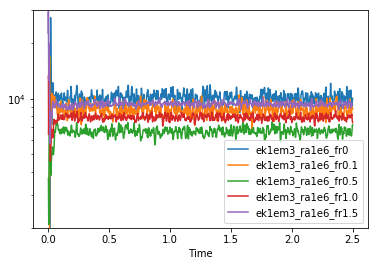

In [27]:
%matplotlib inline
fig, ax = plt.subplots()
for i,g in enumerate(gavgs):
    ax.plot(g.time,g.vals[:,g.lut[401]], label=cases[i])
ax.set_yscale('log')
ax.set_ylim([2e3,3e4])
ax.set_xlabel('Time')
ax.legend()
plt.show()